<a href="https://colab.research.google.com/github/SarahMoshababQ/G3-project/blob/main/Copy_of_NLP_Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


#Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


#Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [ ]:
# !pip install --upgrade tensorflow


In [ ]:
!pip install scikit-plot

In [ ]:
#Load the important libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer ,PorterStemmer
from sklearn.model_selection import train_test_split ,cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score,average_precision_score
from sklearn.linear_model import LogisticRegression
from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score ,PrecisionRecallDisplay
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier
from wordcloud import WordCloud
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout , GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

In [ ]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))


strategy = tf.distribute.TPUStrategy(resolver)


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Data Wrangling

In [ ]:
#read the file
df = pd.read_csv("/content/sample_data/Womens Clothing E-Commerce Reviews.csv")


In [ ]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [ ]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

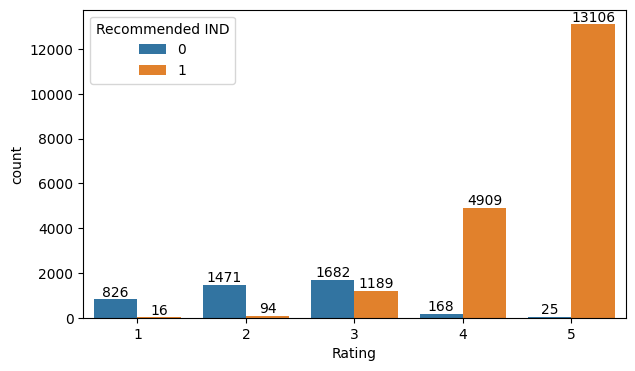

In [ ]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating",
                   data=df,
                   hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

#We can see in the plot there are misclassifications in the rating

In [ ]:
df["Recommended IND"].unique()

array([1, 0])

In [ ]:
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

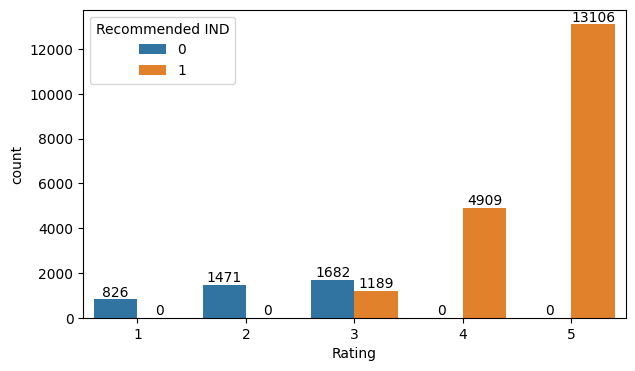

In [ ]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating",
                   data=df,
                   hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p)
#The plot below shows after deleting the classification
#but I keep rating 3 at is it because it could be negative and could be positive

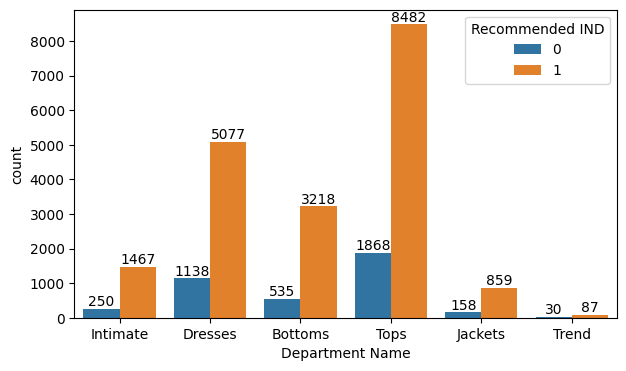

In [ ]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Department Name",
                   data=df,
                   hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

#the plot below shows the recommendations by the department
#and you can see that Tops got most of the recommendations

In [ ]:
# drop the unwanted columns
df_copy=df.drop(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Rating'
       ,'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'], axis=1)

In [ ]:
#check null values
df_copy.isna().sum()

Review Text        838
Recommended IND      0
dtype: int64

In [ ]:
#drop null
df_copy.dropna(inplace=True)

In [ ]:
#check the null values agian to make sure
df_copy.isna().sum()

Review Text        0
Recommended IND    0
dtype: int64

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [ ]:
df_copy['Recommended IND'].value_counts()

1    18431
0     3914
Name: Recommended IND, dtype: int64

In [ ]:
df.value_counts('Recommended IND', normalize=True)

Recommended IND
1    0.828366
0    0.171634
dtype: float64

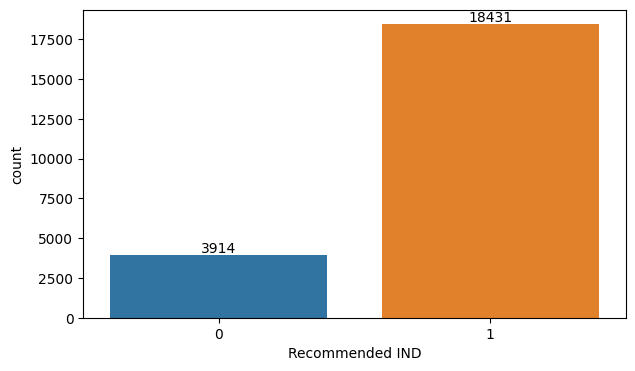

In [ ]:
#plot the value count of each class
ax = sns.countplot(data =df_copy, x = "Recommended IND")
ax.bar_label(ax.containers[0]);

In [ ]:
#check the duplicate
df_copy.duplicated().sum()

7

In [ ]:
#drop the dublicate
df_copy.drop_duplicates(inplace=True)

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [ ]:
df_copy

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23481,I was very happy to snag this dress at such a ...,1
23482,"It reminds me of maternity clothes. soft, stre...",1
23483,"This fit well, but the top was very see throug...",0
23484,I bought this dress for a wedding i have this ...,1


In [ ]:
pd.set_option('display.max_colwidth', None)


In [ ]:
#rename the columns
df_copy = df_copy.rename(columns={"Recommended IND": "target", "Review Text": "text"})
#mapping the classes
df_copy["target"] = df_copy["target"].map({0: 1, 1: 0})

df_copy.head(30)

,text,target
0,Absolutely wonderful - silky and sexy and comfortable,0
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",0
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",1
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",0
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,0
5,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",1
6,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",0
7,"I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...",0
8,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,0
9,"I'm 5""5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typically wear an xs regular in retailer dresses. if you're less busty (34b cup or smaller), a s petite will fit you perfectly (snug, but not tight). i love that i could dress it up for a party, or down for work. i love that the tulle is longer then the fabric underneath.",0


---
---


In [ ]:
df_copy2=df_copy.copy()
df_copy3=df_copy.copy()


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [ ]:
stop_words = set(stopwords.words('english'))

words_to_exclude = {"no", "not"}

stop_words.difference_update(words_to_exclude)


In [ ]:
def cleaning(data):

    import re

    #1. Removing URLS
    data = re.sub('http\S*', '', data).strip()
    data = re.sub('www\S*', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S*', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S*', '', data).strip()

    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")

    data = data.replace(",", "")

    data = data.replace(".", "")

    #5. Tokenize
    text_tokens = word_tokenize(data.lower())

    #6. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]




    #9. joining
    return " ".join( text_cleaned)

In [ ]:
cleaning_text = pd.DataFrame(df_copy["text"].apply(cleaning))

In [ ]:
cleaning_text.head()

,text
0,absolutely wonderful silky sexy comfortable
1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt


In [ ]:
df_copy['text'] = cleaning_text['text']


In [ ]:
df_copy.head(20)

,text,target
0,absolutely wonderful silky sexy comfortable,0
1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,0
2,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c,1
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,0
4,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,0
5,love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress,1
6,aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops,0
7,ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose no xx kept wil ldecide later since light color already sold hte smallest size,0
8,love dress usually get x run little snug bust ordered size flattering feminine usual retailer flair style,0
9,im lb ordered petite make sure length wasnt long typically wear x regular retailer dress youre le busty cup smaller petite fit perfectly snug not tight love could dress party work love tulle longer fabric underneath,0


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [ ]:
df_copy

,text,target
0,absolutely wonderful silky sexy comfortable,0
1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,0
2,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c,1
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,0
4,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,0
...,...,...
23481,happy snag dress great price easy slip flattering cut color combo,0
23482,reminds maternity clothes soft stretchy shiny material cut flattering drape nicely found one button close front looked awkward nice long sleeve not maybe others ok,0
23483,fit well top see never would worked im glad able try store didnt order online different fabric would great,1
23484,bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might not worth side note dress delivered nordstrom tag found much cheaper looking,0


In [ ]:
class_positive=df_copy[df_copy['target']==0]['text']
class_negative=df_copy[df_copy['target']==1]['text']


In [ ]:
class_negative

2        high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
5                                         love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress
10                                                                                                                      dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back
22                                                     

### Collect Words (positive and negative separately)

In [ ]:
positive_w=" ".join(class_positive)
positive_w[:1500]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose no xx kept wil ldecide later since light color alread

In [ ]:
nigative_w=" ".join(class_negative)
nigative_w[:1500]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first not pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning im sure

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [ ]:
worldcloud_p= WordCloud(background_color="black",
                               max_words=250,
                               scale=3)


In [ ]:
worldcloud_p.generate(positive_w)


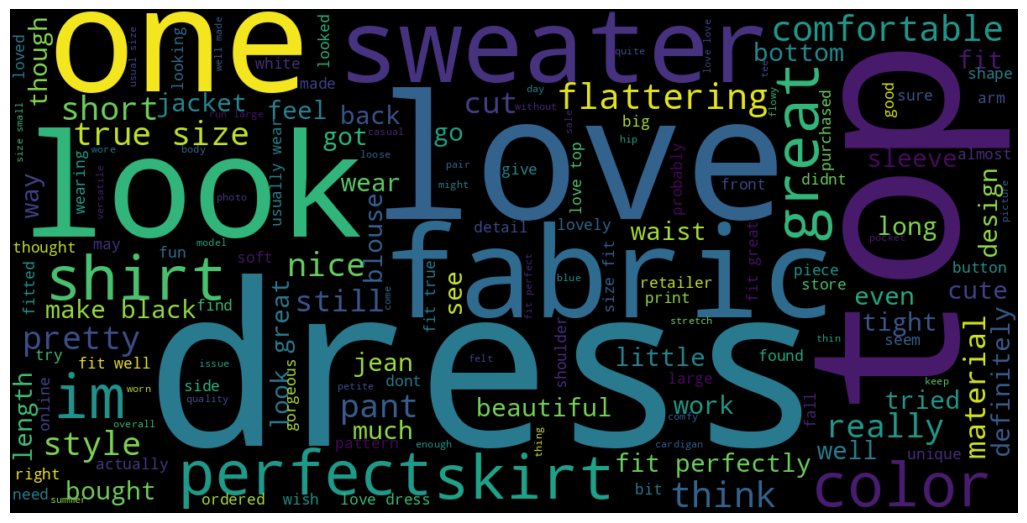

In [ ]:
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_p, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
worldcloud_n= WordCloud(background_color="black",
                               max_words=250,
                               colormap='coolwarm',
                               scale=3)


In [ ]:
worldcloud_n.generate(nigative_w)


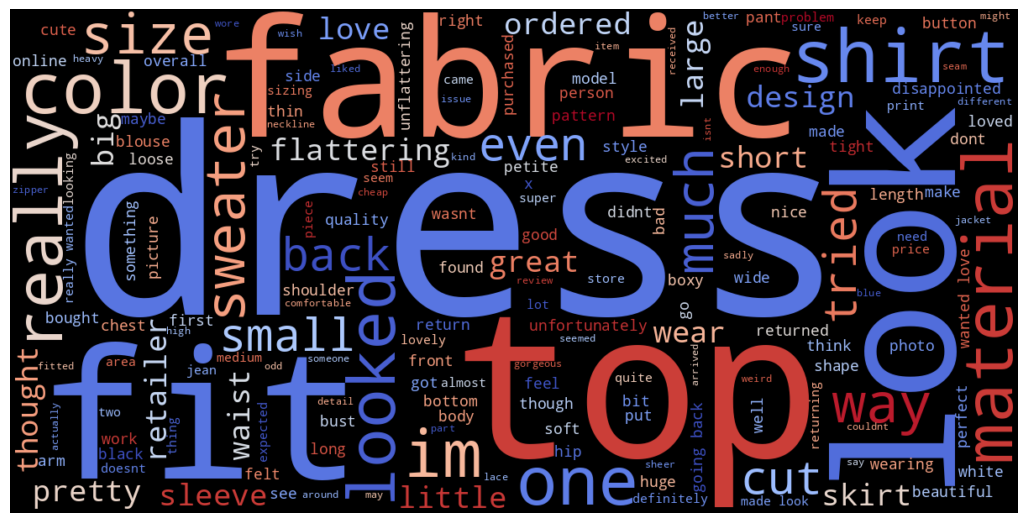

In [ ]:

plt.figure(figsize = (13,13))
plt.imshow(worldcloud_n, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#we can see some words on both sides so hopefully the models are not affected by this

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [ ]:
X = df_copy2["text"]
y = df_copy2["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [ ]:
vectorizer = CountVectorizer(preprocessor=cleaning,min_df = 3) # the miniumm number of tokens is 3 ,no max limit
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out()).loc[2].sort_values(ascending=False)

piece      2
little     1
indoors    1
fell       1
sized      1
          ..
flirty     0
flipped    0
flip       0
flimsy     0
zoom       0
Name: 2, Length: 4881, dtype: int64

### TF-IDF

In [ ]:
tfidf_vectorizer = TfidfVectorizer(preprocessor=cleaning,min_df = 3)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(X_train_tfidf.toarray(), columns = tfidf_vectorizer.get_feature_names_out()).loc[2].sort_values(ascending=False)

overlook    0.356649
indoors     0.341388
piece       0.332924
placed      0.292719
unusual     0.265462
              ...   
flirty      0.000000
flipped     0.000000
flip        0.000000
flimsy      0.000000
zoom        0.000000
Name: 2, Length: 4881, dtype: float64

### Eval Function

In [ ]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

In [ ]:
# I am focusing on class 1
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall-neg': make_scorer(recall_score, average=None, labels = [1]),
            'f1-neg': make_scorer(f1_score, average=None, labels = [1])}

### CountVectorizer

In [ ]:
log = LogisticRegression(C = 0.1, max_iter=1000,class_weight='balanced')
log.fit(X_train_count,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000)

In [ ]:
print("LOG MODEL COUNT")
eval(log, X_train_count, X_test_count)

LOG MODEL COUNT
[[3246  439]
 [ 143  640]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3685
           1       0.59      0.82      0.69       783

    accuracy                           0.87      4468
   macro avg       0.78      0.85      0.80      4468
weighted avg       0.89      0.87      0.88      4468

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.94     14740
           1       0.65      0.93      0.77      3130

    accuracy                           0.90     17870
   macro avg       0.82      0.91      0.85     17870
weighted avg       0.93      0.90      0.91     17870



In [ ]:
model_cv = LogisticRegression(C = 0.1, max_iter=1000)
scores = cross_validate(model_cv, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()[2:]

test_accuracy          0.891998
train_accuracy         0.918927
test_precision-neg     0.759814
train_precision-neg    0.847705
test_recall-neg        0.561981
train_recall-neg       0.654775
test_f1-neg            0.645367
train_f1-neg           0.738846
dtype: float64

In [ ]:
#there is no overfitting

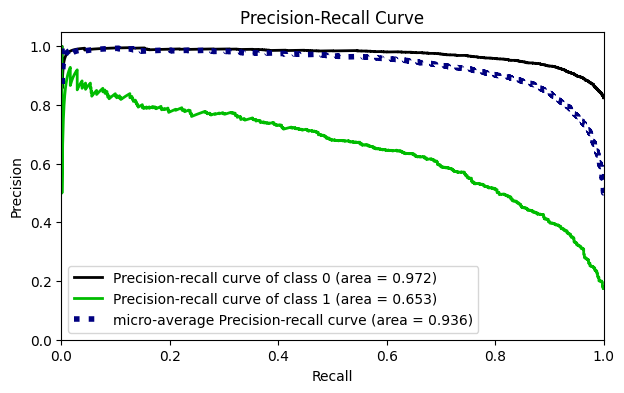

In [ ]:
model = LogisticRegression(C = 0.1, max_iter=1000)

model.fit(X_train_tfidf, y_train)
y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:

y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
log_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

In [ ]:
average_precision_score(y_test, y_pred_proba[:, 1])

0.6526491922250467

### TF-IDF

In [ ]:
log = LogisticRegression(C = 1, max_iter=1000,class_weight='balanced')
log.fit(X_train_tfidf,y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000)

In [ ]:
print("LOG MODEL TF_IDF")
eval(log, X_train_tfidf, X_test_tfidf)

LOG MODEL TF_IDF
[[3223  462]
 [ 126  657]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.92      3685
           1       0.59      0.84      0.69       783

    accuracy                           0.87      4468
   macro avg       0.77      0.86      0.80      4468
weighted avg       0.90      0.87      0.88      4468

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.94     14740
           1       0.64      0.94      0.76      3130

    accuracy                           0.90     17870
   macro avg       0.81      0.91      0.85     17870
weighted avg       0.93      0.90      0.91     17870



In [ ]:
model_cv = LogisticRegression(C = 0.5, max_iter=1000,class_weight='balanced')
scores = cross_validate(model, X_train_tfidf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()[2:]

test_accuracy          0.841186
train_accuracy         0.843705
test_precision-neg     0.892416
train_precision-neg    0.915117
test_recall-neg        0.106070
train_recall-neg       0.118672
test_f1-neg            0.189219
train_f1-neg           0.210079
dtype: float64

In [ ]:
#there is no overfitting

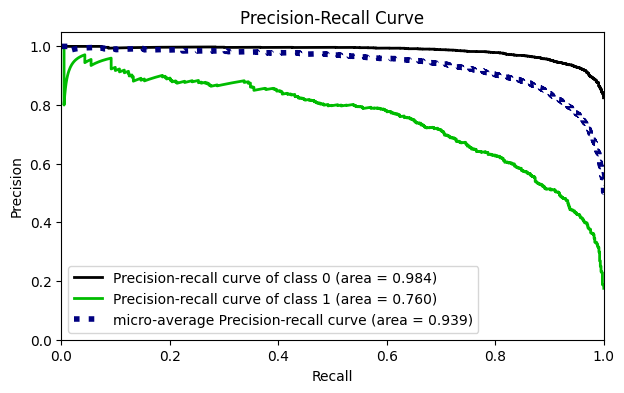

In [ ]:

model = LogisticRegression(C = 1, max_iter=1000,class_weight='balanced')

model.fit(X_train_tfidf, y_train)

y_pred_proba = model.predict_proba(X_test_tfidf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_test_dummies = pd.get_dummies(y_test)

In [ ]:
y_pred = log.predict(X_test_count)
log_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
log_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
log_tfidf_AP_neg = average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

In [ ]:
average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

0.7602153758070183

## Naive Bayes

### Countvectorizer

In [ ]:
nb = MultinomialNB(alpha=1)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=1)

In [ ]:
print("NB MODEL COUNT")
eval(nb, X_train_count, X_test_count)

NB MODEL COUNT
[[3394  291]
 [ 189  594]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3685
           1       0.67      0.76      0.71       783

    accuracy                           0.89      4468
   macro avg       0.81      0.84      0.82      4468
weighted avg       0.90      0.89      0.90      4468

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     14740
           1       0.70      0.83      0.76      3130

    accuracy                           0.91     17870
   macro avg       0.83      0.88      0.85     17870
weighted avg       0.92      0.91      0.91     17870



In [ ]:

model_cv = MultinomialNB(alpha=1)
scores = cross_validate(model_cv, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.888528
train_accuracy         0.909047
test_precision-neg     0.655300
train_precision-neg    0.703572
test_recall-neg        0.769968
train_recall-neg       0.830742
test_f1-neg            0.707663
train_f1-neg           0.761885
dtype: float64

In [ ]:
#there is no overfitting

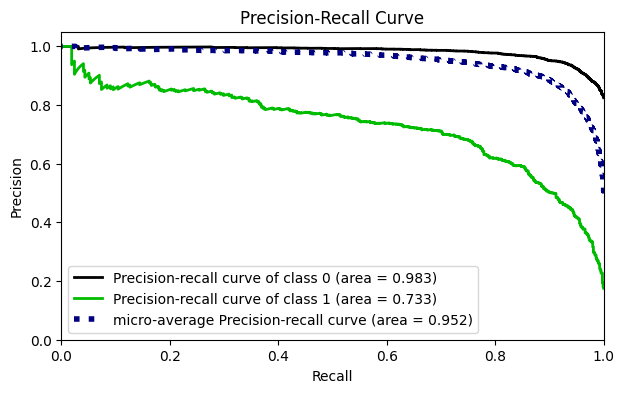

In [ ]:


y_pred_proba = nb.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred_proba

array([[1.75321925e-02, 9.82467808e-01],
       [9.99977369e-01, 2.26313327e-05],
       [9.99999711e-01, 2.89232006e-07],
       ...,
       [9.99418658e-01, 5.81341768e-04],
       [9.22317029e-01, 7.76829706e-02],
       [9.99788079e-01, 2.11921359e-04]])

In [ ]:

y_test_dummies = pd.get_dummies(y_test)

y_pred = nb.predict(X_test_count)
nb_count_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
nb_AP_neg = average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

In [ ]:
average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

0.7329171678925646

### TF-IDF

In [ ]:
nb = MultinomialNB(alpha=0.15)
nb.fit(X_train_tfidf,y_train)

MultinomialNB(alpha=0.15)

In [ ]:
print("NB MODEL tf_idf")
eval(nb, X_train_tfidf, X_test_tfidf)

NB MODEL tf_idf
[[3641   44]
 [ 546  237]]
Test_Set
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      3685
           1       0.84      0.30      0.45       783

    accuracy                           0.87      4468
   macro avg       0.86      0.65      0.69      4468
weighted avg       0.87      0.87      0.84      4468

Train_Set
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     14740
           1       0.92      0.44      0.60      3130

    accuracy                           0.90     17870
   macro avg       0.90      0.72      0.77     17870
weighted avg       0.90      0.90      0.88     17870



In [ ]:
model_cv = MultinomialNB(alpha=.15)
scores = cross_validate(model_cv, X_train_tfidf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.870845
train_accuracy         0.896207
test_precision-neg     0.849682
train_precision-neg    0.919773
test_recall-neg        0.320128
train_recall-neg       0.446361
test_f1-neg            0.464350
train_f1-neg           0.601025
dtype: float64

In [ ]:
#there is no overfitting

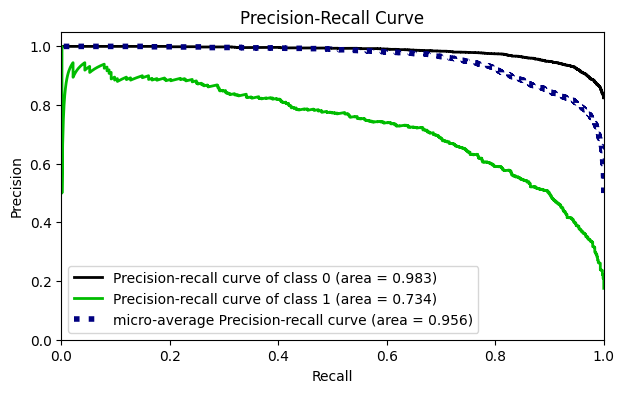

In [ ]:

y_pred_proba = nb.predict_proba(X_test_tfidf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred_proba

array([[0.76264496, 0.23735504],
       [0.93556902, 0.06443098],
       [0.98957376, 0.01042624],
       ...,
       [0.98054633, 0.01945367],
       [0.84556415, 0.15443585],
       [0.95090726, 0.04909274]])

In [ ]:
y_test_dummies = pd.get_dummies(y_test)

y_pred = nb.predict(X_test_tfidf)
nb_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
nb_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
nb_tfidf_AP_neg = average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

In [ ]:
average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

0.734469456044677

## Support Vector Machine (SVM)

### Countvectorizer

In [ ]:
svc = SVC(C=.15 ,class_weight="balanced",probability=True)
svc.fit(X_train_count,y_train)

SVC(C=0.15, class_weight='balanced', probability=True)

In [ ]:
print("SVC MODEL count")
eval(svc, X_train_count, X_test_count)

SVC MODEL count
[[3024  661]
 [ 107  676]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      3685
           1       0.51      0.86      0.64       783

    accuracy                           0.83      4468
   macro avg       0.74      0.84      0.76      4468
weighted avg       0.89      0.83      0.84      4468

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     14740
           1       0.58      0.94      0.72      3130

    accuracy                           0.87     17870
   macro avg       0.78      0.90      0.82     17870
weighted avg       0.91      0.87      0.88     17870



In [ ]:
model_cv = SVC(C=0.15,class_weight='balanced',probability=True)
scores = cross_validate(model_cv, X_train_count, y_train, scoring = scoring, cv = 5, return_train_score=True, n_jobs=-1,
    verbose=2,)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 30.1min finished


test_accuracy          0.832736
train_accuracy         0.866466
test_precision-neg     0.513743
train_precision-neg    0.572078
test_recall-neg        0.861022
train_recall-neg       0.943371
test_f1-neg            0.643409
train_f1-neg           0.712227
dtype: float64

In [ ]:
#there is no overfitting

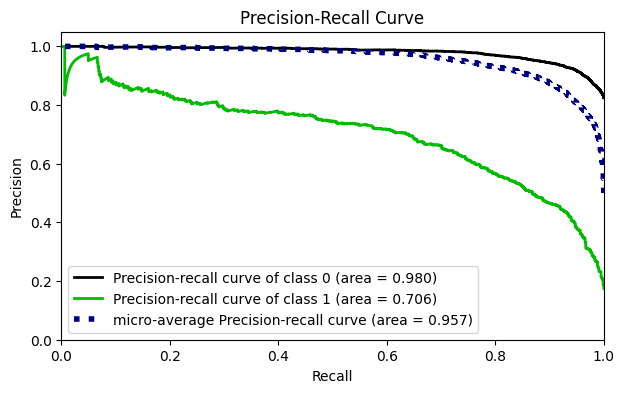

In [ ]:

y_pred_proba = svc.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:

y_test_dummies = pd.get_dummies(y_test)

y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred, labels=[1], average=None)
svc_count_f1_neg = f1_score(y_test, y_pred, labels=[1], average=None)
svc_AP_neg = average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

In [ ]:
average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

0.7058059774723212

### TD-IDF

In [ ]:
svc = SVC(C=.15 ,class_weight="balanced",probability=True)
svc.fit(X_train_tfidf,y_train)

SVC(C=0.15, class_weight='balanced', probability=True)

In [ ]:
print("SVC MODEL TF_IDF")
eval(svc, X_train_tfidf, X_test_tfidf)

SVC MODEL TF_IDF
[[3135  550]
 [ 110  673]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      3685
           1       0.55      0.86      0.67       783

    accuracy                           0.85      4468
   macro avg       0.76      0.86      0.79      4468
weighted avg       0.89      0.85      0.86      4468

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     14740
           1       0.62      0.96      0.76      3130

    accuracy                           0.89     17870
   macro avg       0.81      0.92      0.84     17870
weighted avg       0.93      0.89      0.90     17870



In [ ]:
model_cv = SVC(C=0.15,class_weight="balanced",probability=True,verbose=2)
scores = cross_validate(model_cv, X_train_tfidf, y_train, scoring = scoring, cv = 5, return_train_score=True, n_jobs=-1,
    verbose=2,)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 32.4min finished


test_accuracy          0.857191
train_accuracy         0.892529
test_precision-neg     0.559413
train_precision-neg    0.625576
test_recall-neg        0.871885
train_recall-neg       0.962620
test_f1-neg            0.681462
train_f1-neg           0.758328
dtype: float64

In [ ]:
#there is no overfitting

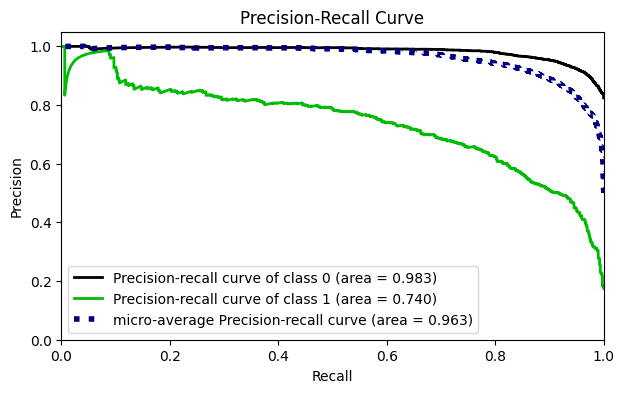

In [ ]:

y_pred_proba = svc.predict_proba(X_test_tfidf)

plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [ ]:
y_test_dummies = pd.get_dummies(y_test)

y_pred = svc.predict(X_test_tfidf)
svc_tfidf_rec_neg = recall_score(y_test, y_pred, labels=[1], average=None)
svc_tfidf_f1_neg = f1_score(y_test, y_pred, labels=[1], average=None)
svc_tfidf_AP_neg = average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

In [ ]:
average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

0.7403421803403232

## Random Forest

### Countvectorizer

In [ ]:
rf = RandomForestClassifier(150, max_depth = 40, random_state = 42, n_jobs = -1,class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_estimators=150,
                       n_jobs=-1, random_state=42)

In [ ]:
print("RF MODEL count")
eval(rf, X_train_count, X_test_count)

RF MODEL count
[[3537  148]
 [ 389  394]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3685
           1       0.73      0.50      0.59       783

    accuracy                           0.88      4468
   macro avg       0.81      0.73      0.76      4468
weighted avg       0.87      0.88      0.87      4468

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     14740
           1       0.95      0.98      0.96      3130

    accuracy                           0.99     17870
   macro avg       0.97      0.98      0.98     17870
weighted avg       0.99      0.99      0.99     17870



In [ ]:
model_cv = RandomForestClassifier(140, max_depth = 50, random_state = 42, n_jobs = -1,class_weight="balanced")
scores = cross_validate(model_cv, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.876609
train_accuracy         0.993577
test_precision-neg     0.761796
train_precision-neg    0.974514
test_recall-neg        0.430351
train_recall-neg       0.989208
test_f1-neg            0.549613
train_f1-neg           0.981803
dtype: float64

In [ ]:
#there is an overfitting

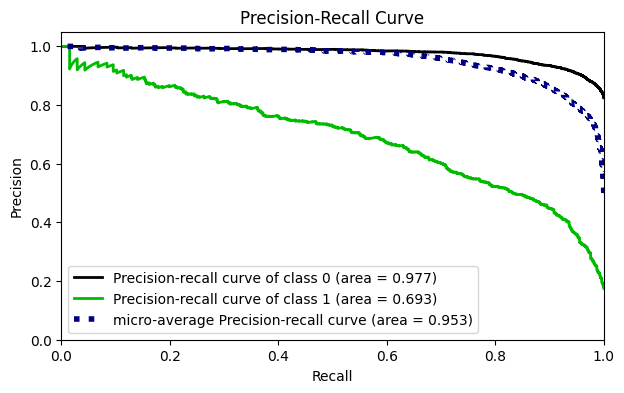

In [ ]:


y_pred_proba = rf.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
rf_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

In [ ]:
average_precision_score(y_test, y_pred_proba[:, 1])

0.6932115440145927

### TF-IDF

In [ ]:
rf = RandomForestClassifier(100, max_depth = 50, random_state = 42, n_jobs = -1,class_weight="balanced") # class_weight="balanced"
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=50, n_jobs=-1,
                       random_state=42)

In [ ]:
print("RF MODEL TF_IDF")
eval(rf, X_train_tfidf, X_test_tfidf)

RF MODEL TF_IDF
[[3556  129]
 [ 446  337]]
Test_Set
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      3685
           1       0.72      0.43      0.54       783

    accuracy                           0.87      4468
   macro avg       0.81      0.70      0.73      4468
weighted avg       0.86      0.87      0.86      4468

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14740
           1       0.98      0.99      0.99      3130

    accuracy                           1.00     17870
   macro avg       0.99      1.00      0.99     17870
weighted avg       1.00      1.00      1.00     17870



In [ ]:
model_cv = RandomForestClassifier(100, max_depth = 50, random_state = 42, n_jobs = -1,class_weight="balanced")
scores = cross_validate(model, X_train_tfidf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.871964
train_accuracy         0.899266
test_precision-neg     0.593419
train_precision-neg    0.646306
test_recall-neg        0.858466
train_recall-neg       0.938481
test_f1-neg            0.701488
train_f1-neg           0.765459
dtype: float64

In [ ]:
#there is no overfitting

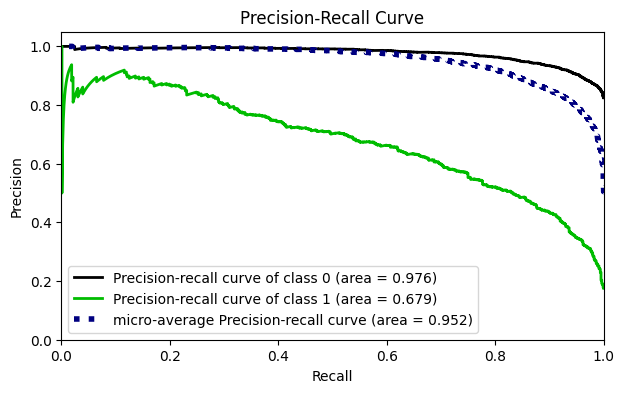

In [ ]:

y_pred_proba = rf.predict_proba(X_test_tfidf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = rf.predict(X_test_tfidf)
rf_tdidf_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
rf_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
rf_tfidf_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

In [ ]:
average_precision_score(y_test, y_pred_proba[:, 1])

0.6794022477349684

## Ada Boosting

### Countvectorizer

In [ ]:
ada = AdaBoostClassifier(n_estimators= 600, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=600, random_state=42)

In [ ]:
print("Ada MODEL count")
eval(ada, X_train_count, X_test_count)

Ada MODEL count
[[3480  205]
 [ 326  457]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3685
           1       0.69      0.58      0.63       783

    accuracy                           0.88      4468
   macro avg       0.80      0.76      0.78      4468
weighted avg       0.88      0.88      0.88      4468

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14740
           1       0.82      0.70      0.76      3130

    accuracy                           0.92     17870
   macro avg       0.88      0.84      0.86     17870
weighted avg       0.92      0.92      0.92     17870



In [ ]:
model_cv = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model_cv, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.888920
train_accuracy         0.918436
test_precision-neg     0.722570
train_precision-neg    0.815663
test_recall-neg        0.595527
train_recall-neg       0.690380
test_f1-neg            0.652210
train_f1-neg           0.747787
dtype: float64

In [ ]:
#there is an overfitting

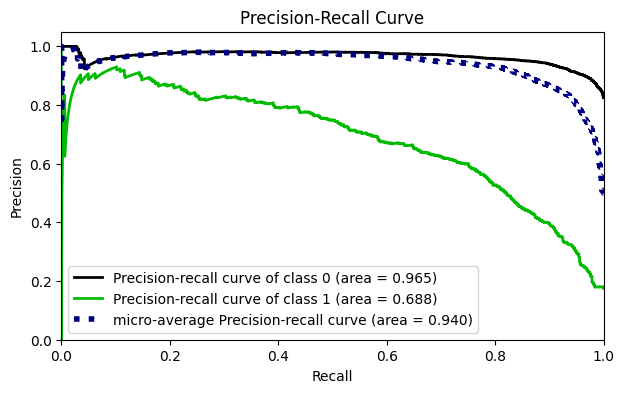

In [ ]:


y_pred_proba = ada.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_test_dummies = pd.get_dummies(y_test)

y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
ada_AP_neg = average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

In [ ]:
average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

0.6877949058438622

### TF-IDF

In [ ]:
ada = AdaBoostClassifier(n_estimators= 600, random_state = 42)
ada.fit(X_train_tfidf, y_train)

AdaBoostClassifier(n_estimators=600, random_state=42)

In [ ]:
print("Ada MODEL TF_IDF")
eval(ada, X_train_tfidf, X_test_tfidf)

Ada MODEL TF_IDF
[[3477  208]
 [ 334  449]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3685
           1       0.68      0.57      0.62       783

    accuracy                           0.88      4468
   macro avg       0.80      0.76      0.78      4468
weighted avg       0.87      0.88      0.87      4468

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14740
           1       0.85      0.76      0.80      3130

    accuracy                           0.93     17870
   macro avg       0.90      0.86      0.88     17870
weighted avg       0.93      0.93      0.93     17870



In [ ]:
model_cv = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model_cv, X_train_tfidf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.880470
train_accuracy         0.932394
test_precision-neg     0.688236
train_precision-neg    0.848322
test_recall-neg        0.581150
train_recall-neg       0.747710
test_f1-neg            0.629875
train_f1-neg           0.794844
dtype: float64

In [ ]:
#there is an overfitting

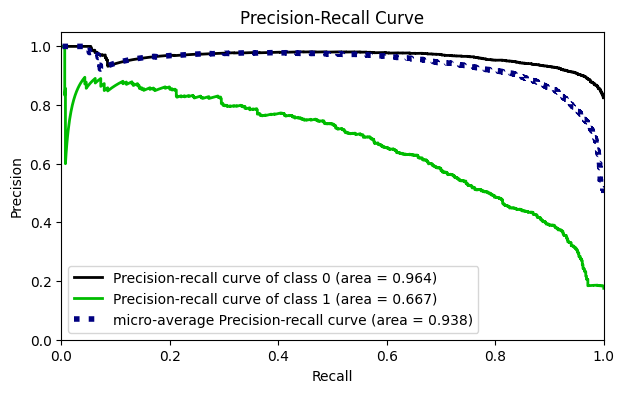

In [ ]:

y_pred_proba = ada.predict_proba(X_test_tfidf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_test_dummies = pd.get_dummies(y_test)

y_pred = ada.predict(X_test_tfidf)
ada_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
ada_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
ada_tfidf_AP_neg = average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

In [ ]:
average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

0.6665490779187939

## DL modeling

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


### Tokenization

In [ ]:
X = df_copy3['text']
y = df_copy3['target']

In [ ]:
num_words = 10000

tokenizer = Tokenizer(num_words=num_words)

In [ ]:
tokenizer.fit_on_texts(X)

### Creating word index

In [ ]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'if': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'soft': 60,
 'an': 61,
 'out': 62,
 'back': 63,
 'can': 64,
 'because': 65,
 'had': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'bought': 71,
 'than': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [ ]:
len(tokenizer.word_index)

14757

### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [ ]:
X[:2] #the entry was considered to be class 1 with good feedback!!!!
#maybe it the because of rating 3 ! or the wrong entry from the customer

0                                                                                                                                                                                                                                                              Absolutely wonderful - silky and sexy and comfortable
1    Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.
Name: text, dtype: object

In [ ]:
X_num_tokens[:2]

[[253, 530, 921, 3, 656, 3, 68],
 [21,
  7,
  18,
  33,
  1726,
  100,
  2,
  1370,
  8,
  222,
  5,
  9,
  4,
  105,
  3,
  36,
  311,
  2,
  132,
  1255,
  2,
  432,
  41,
  24,
  52,
  5,
  136,
  1255,
  33,
  94,
  2,
  71,
  4,
  94,
  3,
  38,
  503,
  2,
  21,
  1,
  86,
  11,
  31,
  411,
  39,
  4,
  53,
  453,
  1,
  392,
  41,
  154,
  29,
  4,
  130,
  1355,
  11,
  448,
  439,
  6,
  773,
  94]]

### Maximum number of tokens for all documents¶

In [ ]:
len(X_num_tokens[15])

96

In [ ]:
len(X_num_tokens[10])

66

In [ ]:
len(X_num_tokens[59])

51

In [ ]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
num_tokens

array([ 7, 62, 97, ..., 42, 85, 18])

In [ ]:
num_tokens.mean()

60.34506222580357

In [ ]:
num_tokens.max()

116

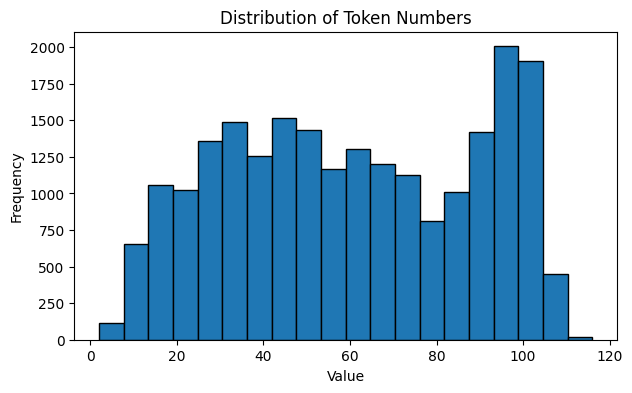

In [ ]:
plt.hist(num_tokens, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title("Distribution of Token Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#from the plot seems until value 105 there is no useful information
max_tokens = 105

In [ ]:
sum(num_tokens <= max_tokens) / len(num_tokens)

0.9850926672038679

In [ ]:
sum(num_tokens <= max_tokens)

22005

In [ ]:
len(num_tokens)

22338

### Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre")

In [ ]:
X_pad.shape

(22338, 105)

### Train Set Split

In [ ]:
X_num_tokens[10]

[18,
 131,
 46,
 3383,
 355,
 1,
 470,
 298,
 131,
 2,
 52,
 1,
 1505,
 82,
 415,
 78,
 31,
 3,
 5,
 15,
 23,
 150,
 1,
 83,
 11,
 1,
 25,
 76,
 3,
 309,
 23,
 487,
 20,
 101,
 39,
 1098,
 11,
 5,
 55,
 1767,
 5,
 8,
 2199,
 1,
 45,
 100,
 335,
 30,
 5,
 15,
 176,
 8,
 29,
 17,
 1165,
 18,
 7,
 438,
 2279,
 8,
 279,
 5,
 55,
 29,
 176,
 63]

In [ ]:
len(X_num_tokens[1])

62

In [ ]:
X_pad[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   21,
          7,   18,   33, 1726,  100,    2, 1370,    8,  222,    5,    9,
          4,  105,    3,   36,  311,    2,  132, 1255,    2,  432,   41,
         24,   52,    5,  136, 1255,   33,   94,    2,   71,    4,   94,
          3,   38,  503,    2,   21,    1,   86,   11,   31,  411,   39,
          4,   53,  453,    1,  392,   41,  154,   29,    4,  130, 1355,
         11,  448,  439,    6,  773,   94], dtype=int32)

In [ ]:
np.array(X_num_tokens[77])

array([   1,  470, 2004,   11,    7,  196,    1,  172,  182,    2,  225,
          5,   23,  971,  234,    2,   21,    1,  142,   36,  291,  176,
          8,  179,    8, 2609,    1,  470,  573,   14,  295, 5069,   10,
       2105,   20,   33,  486,    8,   20])

In [ ]:
X_pad[77]


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          1,  470, 2004,   11,    7,  196,    1,  172,  182,    2,  225,
          5,   23,  971,  234,    2,   21,    1,  142,   36,  291,  176,
          8,  179,    8, 2609,    1,  470,  573,   14,  295, 5069,   10,
       2105,   20,   33,  486,    8,   20], dtype=int32)

### Modeling

In [ ]:
unique_labels = df_copy3['target'].unique()
unique_labels


array([0, 1])

In [ ]:
df_copy3.head()

,text,target
0,Absolutely wonderful - silky and sexy and comfortable,0
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",0
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",1
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",0
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,0


In [ ]:
X_train_temp, X_test2, y_train_temp, y_test2 = train_test_split(X_pad, y, test_size=0.2,stratify=y, random_state=42)

X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train_temp, y_train_temp, test_size=0.1, random_state=42)

In [ ]:
y_val2

5377     1
5701     0
21798    1
14456    0
15747    0
        ..
8759     0
823      0
9614     1
12201    0
15721    1
Name: target, Length: 1787, dtype: int64

In [ ]:
model_dl = Sequential()

In [ ]:
embedding_size = 80

In [ ]:
model_dl.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))

model_dl.add(Dropout(0.2))

model_dl.add(GRU(units=50, return_sequences=True))

model_dl.add(Dropout(0.2))

model_dl.add(GRU(units=30, return_sequences=True))

model_dl.add(Dropout(0.2))

model_dl.add(GRU(units=10, return_sequences=False))

model_dl.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = Adam(learning_rate=0.008)

In [ ]:
model_dl.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [ ]:
model_dl.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 105, 80)           800000    
                                                                 
 dropout (Dropout)           (None, 105, 80)           0         
                                                                 
 gru (GRU)                   (None, 105, 50)           19800     
                                                                 
 dropout_1 (Dropout)         (None, 105, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 105, 30)           7380      
                                                                 
 dropout_2 (Dropout)         (None, 105, 30)           0         
                                                                 
 gru_2 (GRU)                 (None, 10)                1

In [ ]:

early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1,patience = 3, restore_best_weights=True)

In [ ]:

model_dl.fit(X_train2, y_train2, epochs=20, batch_size=32,validation_data=(X_val2, y_val2), callbacks=[early_stop])

Epoch 1/20
503/503 [==============================] - 58s 102ms/step - loss: 0.3005 - recall: 0.5035 - val_loss: 0.2279 - val_recall: 0.7036
Epoch 2/20
503/503 [==============================] - 50s 99ms/step - loss: 0.1887 - recall: 0.7702 - val_loss: 0.2395 - val_recall: 0.6286
Epoch 3/20
503/503 [==============================] - 50s 98ms/step - loss: 0.1453 - recall: 0.8393 - val_loss: 0.2744 - val_recall: 0.6464
Epoch 4/20
503/503 [==============================] - 49s 98ms/step - loss: 0.1213 - recall: 0.8653 - val_loss: 0.3021 - val_recall: 0.5643
Epoch 4: early stopping


### Model Evaluation

In [ ]:
model_loss = pd.DataFrame(model_dl.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.300474,0.503509,0.227878,0.703571
1,0.188653,0.770175,0.239510,0.628571
2,0.145294,0.839298,0.274421,0.646429
3,0.121300,0.865263,0.302147,0.564286


In [ ]:
#there is an overfitting

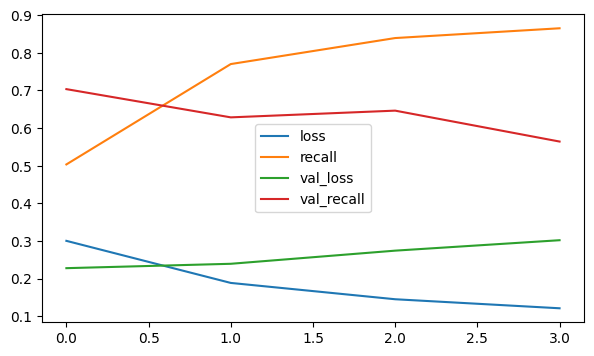

In [ ]:
model_loss.plot();

In [ ]:
model_dl.evaluate(X_test2, y_test2)

140/140 [==============================] - 3s 23ms/step - loss: 0.2308 - recall: 0.6858


[0.23082244396209717, 0.6858237385749817]

In [ ]:
model_dl.evaluate(X_train2, y_train2)

503/503 [==============================] - 12s 24ms/step - loss: 0.1758 - recall: 0.8119


[0.17579969763755798, 0.8119298219680786]

In [ ]:
y_pred = model_dl.predict(X_test2) >= 0.5
print("Test_Set")
print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2,y_pred))


140/140 [==============================] - 4s 20ms/step
Test_Set
[[3491  194]
 [ 246  537]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3685
           1       0.73      0.69      0.71       783

    accuracy                           0.90      4468
   macro avg       0.83      0.82      0.83      4468
weighted avg       0.90      0.90      0.90      4468



In [ ]:
y_pred_train = model_dl.predict(X_train2) >= 0.5
print("Train_Set")
print(confusion_matrix(y_train2, y_pred_train))
print(classification_report(y_train2, y_pred_train))

503/503 [==============================] - 9s 19ms/step
Train_Set
[[12691   542]
 [  536  2314]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     13233
           1       0.81      0.81      0.81      2850

    accuracy                           0.93     16083
   macro avg       0.88      0.89      0.89     16083
weighted avg       0.93      0.93      0.93     16083



In [ ]:
y_pred

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

140/140 [==============================] - 3s 19ms/step


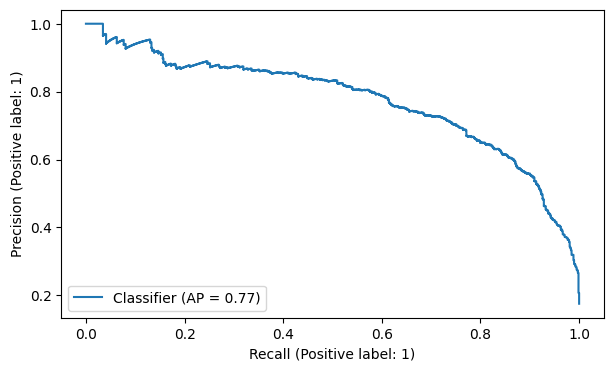

In [ ]:
y_pred_proba = model_dl.predict(X_test2)

PrecisionRecallDisplay.from_predictions(y_test2, y_pred_proba)

In [ ]:
DL_UNWEIGHTED_rec =recall_score(y_test2, y_pred)
DL_UNWEIGHTED_f1 = f1_score(y_test2, y_pred)
DL_UNWEIGHTED_AP =average_precision_score(y_test2, y_pred_proba)

In [ ]:
average_precision_score(y_test2, y_pred_proba)

0.7748316089272128

## DL Modeling with Weighted

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train2)
pd.Series(classes_weights).unique()

array([2.82157895, 0.60768533])

In [ ]:
model_dl.fit(X_train2, y_train2, epochs=10, batch_size=32, sample_weight=classes_weights,
         validation_data=(X_val2, y_val2), callbacks=[early_stop])

Epoch 1/10
503/503 [==============================] - 54s 99ms/step - loss: 0.2639 - recall: 0.9130 - val_loss: 0.3761 - val_recall: 0.8643
Epoch 2/10
503/503 [==============================] - 49s 98ms/step - loss: 0.1985 - recall: 0.9428 - val_loss: 0.3251 - val_recall: 0.8036
Epoch 3/10
503/503 [==============================] - 50s 99ms/step - loss: 0.1765 - recall: 0.9495 - val_loss: 0.3835 - val_recall: 0.8893
Epoch 4/10
503/503 [==============================] - 50s 99ms/step - loss: 0.1706 - recall: 0.9533 - val_loss: 0.2799 - val_recall: 0.7107
Epoch 5/10
503/503 [==============================] - 49s 97ms/step - loss: 0.1665 - recall: 0.9516 - val_loss: 0.4131 - val_recall: 0.8500
Epoch 6/10
503/503 [==============================] - 49s 98ms/step - loss: 0.1507 - recall: 0.9575 - val_loss: 0.3094 - val_recall: 0.7107
Epoch 6: early stopping


In [ ]:
model_loss2 = pd.DataFrame(model_dl.history.history)
model_loss2.head()

,loss,recall,val_loss,val_recall
0,0.263949,0.912982,0.376054,0.864286
1,0.198485,0.942807,0.325079,0.803571
2,0.176459,0.949474,0.383547,0.889286
3,0.170586,0.953333,0.279878,0.710714
4,0.166547,0.951579,0.413053,0.850000


In [ ]:
#there is an overfitting

<Axes: >

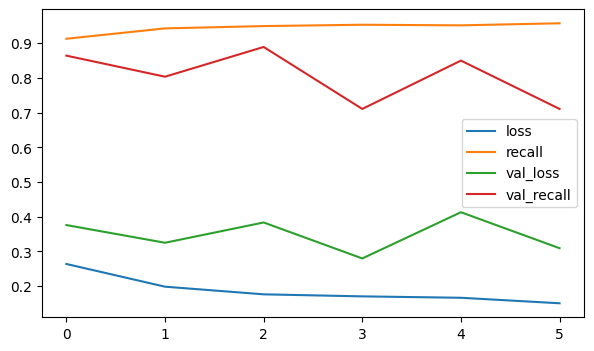

In [ ]:
model_loss2.plot()

In [ ]:
y_pred = model_dl.predict(X_test2) >= 0.5

print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2, y_pred))

140/140 [==============================] - 3s 19ms/step
[[3144  541]
 [ 111  672]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      3685
           1       0.55      0.86      0.67       783

    accuracy                           0.85      4468
   macro avg       0.76      0.86      0.79      4468
weighted avg       0.89      0.85      0.87      4468



In [ ]:
y_train_pred = model_dl.predict(X_train2) >= 0.5

print(confusion_matrix(y_train2, y_train_pred))
print(classification_report(y_train2, y_train_pred))

503/503 [==============================] - 9s 19ms/step
[[12002  1231]
 [   31  2819]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     13233
           1       0.70      0.99      0.82      2850

    accuracy                           0.92     16083
   macro avg       0.85      0.95      0.88     16083
weighted avg       0.94      0.92      0.93     16083



140/140 [==============================] - 3s 19ms/step


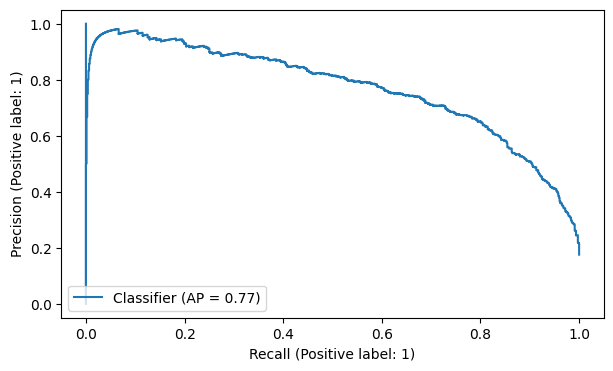

In [ ]:
y_pred_proba = model_dl.predict(X_test2)

PrecisionRecallDisplay.from_predictions(y_test2, y_pred_proba)

In [ ]:
DL_WEIGHTED_rec =recall_score(y_test2, y_pred)
DL_WEIGHTED_f1 = f1_score(y_test2, y_pred)
DL_WEIGHTED_AP =average_precision_score(y_test2, y_pred_proba)

In [ ]:
average_precision_score(y_test2, y_pred_proba)

0.7701238868311139

## BERT Modeling

### Read Data

In [ ]:
X1 = df_copy3['text']
y1 = df_copy3['target']

In [ ]:
y1.head()

0    0
1    0
2    1
3    0
4    0
Name: target, dtype: int64

### Train test split

In [ ]:
X_train_temp, X_test3, y_train_temp, y_test3 = train_test_split(X1, y1, test_size=0.2,stratify=y1, random_state=42)

X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train_temp, y_train_temp, test_size=0.1, random_state=42)

### Tokenization

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.9 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

(…)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

(…)o/bert-base-cased/resolve/main/vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

(…)t-base-cased/resolve/main/tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

(…)bert-base-cased/resolve/main/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
tokenizer2 = BertTokenizer.from_pretrained('bert-base-uncased')


(…)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

(…)bert-base-uncased/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)base-uncased/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

(…)rt-base-uncased/resolve/main/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

### Fixing token counts of all documents

In [ ]:
number_tokens_sentences = []
for sent in X1:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer2.encode(sent, add_special_tokens=True) # we use tokenizer2 for uncased
    number_tokens_sentences.append(len(input_ids))

print('Max sentence length: ', max(number_tokens_sentences))


Max sentence length:  162


In [ ]:
np.array(number_tokens_sentences).mean()

76.69849583669084

In [ ]:
token_size =145
sum(np.array(number_tokens_sentences) < token_size) / len(number_tokens_sentences)


0.9984779299847792

In [ ]:
all_tokens = tokenizer2.encode_plus(list(X),
                                max_length=145,
                                truncation=True,
                                padding='max_length',
                                add_special_tokens=True)


In [ ]:
np.array(all_tokens['input_ids'])

array([101, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 102])

In [ ]:
np.array(all_tokens['attention_mask'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Transformation Vectors to Matrices

In [ ]:
def transformation(X):
  seq_len = 145

  Xids = []
  Xmask = []


  for text in X:

      tokens = tokenizer2.encode_plus(text, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True)

      Xids.append(tokens['input_ids'])
      Xmask.append(tokens['attention_mask'])


  return np.array(Xids), np.array(Xmask)

In [ ]:
Xids_train, Xmask_train = transformation(X_train3)
Xids_val, Xmask_val = transformation(X_val3)


Xids_test, Xmask_test = transformation(X_test3)

In [ ]:
Xids_train

array([[  101,  1045,  2359, ...,     0,     0,     0],
       [  101,  1045,  2293, ...,     0,     0,     0],
       [  101,  1045,  2428, ...,     0,     0,     0],
       ...,
       [  101,  2748,  2009, ...,     0,     0,     0],
       [  101,  1045,  7451, ...,     0,     0,     0],
       [  101,  2009, 19764, ...,     0,     0,     0]])

In [ ]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_val.shape   :", Xids_val.shape)
print("Xmask_val.shape  :", Xmask_val.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (16083, 145)
Xmask_train.shape : (16083, 145)
Xids_val.shape   : (1787, 145)
Xmask_val.shape  : (1787, 145)
Xids_test.shape   : (4468, 145)
Xmask_test.shape  : (4468, 145)


In [ ]:
labels_train = y_train3.values.reshape(-1, 1)
labels_train

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
labels_val = y_val3.values.reshape(-1, 1)
labels_val

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [ ]:
labels_test = y_test3.values.reshape(-1, 1)
labels_test

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Transformation Matrix to Tensorflow tensor

In [ ]:
dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(145,), dtype=tf.int64, name=None), TensorSpec(shape=(145,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_val = tf.data.Dataset.from_tensor_slices((Xids_val, Xmask_val, labels_val))
dataset_val

<_TensorSliceDataset element_spec=(TensorSpec(shape=(145,), dtype=tf.int64, name=None), TensorSpec(shape=(145,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(145,), dtype=tf.int64, name=None), TensorSpec(shape=(145,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [ ]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)
dataset_val = dataset_val.map(map_func)



In [ ]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(145,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(145,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(145,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(145,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_val

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(145,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(145,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [ ]:
batch_size = 20

train_ds = dataset_train.batch(batch_size)
val_ds = dataset_val.batch(batch_size)

In [ ]:
test_ds = dataset_test.batch(batch_size)

In [ ]:
train_ds

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 145), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 145), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

### Creating optimization

In [ ]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 947.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.4 MB/s eta 0:00:00


In [ ]:
len(X_train3)

16083

In [ ]:
len(X_train3)/20

804.15

In [ ]:
print(len(train_ds))
print(len(train_ds)*3)
print(int(0.1*len(train_ds)*3))

805
2415
241


In [ ]:
from official.nlp import optimization
epochs = 3
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 1e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

### Creating Model with TPU

In [ ]:
def create_model():
    from transformers import TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFBertModel.from_pretrained("bert-base-uncased")
    input_ids = Input(shape=(145,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(145,), name='attention_mask', dtype='int32')
    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"]
    x = Dense(180, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)


In [ ]:
with strategy.scope():

  # from tensorflow.keras.metrics import Recall
  # from tensorflow.keras.losses import BinaryCrossentropy

  optimizer = optimizer

  loss = tf.keras.losses.BinaryCrossentropy()
  CustomRecall = tf.keras.metrics.Recall()
  model_bert = create_model()
  model_bert.compile(optimizer=optimizer, loss=loss, metrics=[CustomRecall])

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
model_bert.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 145)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 145)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 145,                                           

### Model Fiting

In [ ]:
model_bert.fit(train_ds, validation_data= val_ds, epochs=epochs)

Epoch 1/3
805/805 [==============================] - 270s 175ms/step - loss: 0.6339 - recall: 0.8004 - val_loss: 0.6277 - val_recall: 0.8214
Epoch 2/3
805/805 [==============================] - 81s 101ms/step - loss: 0.5488 - recall: 0.8611 - val_loss: 0.3672 - val_recall: 0.7500
Epoch 3/3
805/805 [==============================] - 79s 98ms/step - loss: 0.5070 - recall: 0.8688 - val_loss: 0.4902 - val_recall: 0.8464


### Model evaluation

In [ ]:
model_loss = pd.DataFrame(model_bert.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.633919,0.800351,0.627745,0.821429
1,0.548837,0.861053,0.367215,0.750000
2,0.506996,0.868772,0.490158,0.846429


In [ ]:
#there is no overfitting

<Axes: >

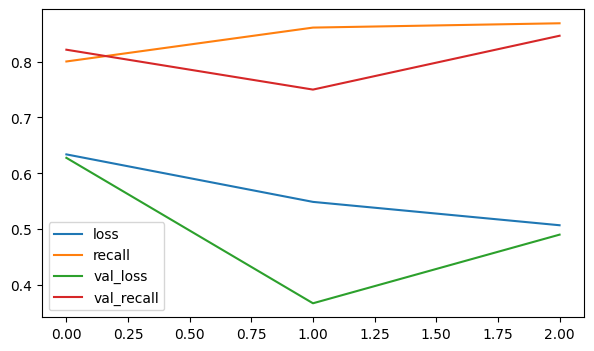

In [ ]:
model_loss.plot()

In [ ]:
y_pred = model_bert.predict(test_ds) >= 0.5
print(confusion_matrix(y_test3, y_pred))
print(classification_report(y_test3, y_pred))

224/224 [==============================] - 23s 75ms/step
[[3479  206]
 [ 118  665]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      3685
           1       0.76      0.85      0.80       783

    accuracy                           0.93      4468
   macro avg       0.87      0.90      0.88      4468
weighted avg       0.93      0.93      0.93      4468



In [ ]:
y_train_pred = model_bert.predict(train_ds) >= 0.5
print(confusion_matrix(y_train3, y_train_pred))
print(classification_report(y_train3, y_train_pred))

805/805 [==============================] - 21s 25ms/step
[[12699   534]
 [  357  2493]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     13233
           1       0.82      0.87      0.85      2850

    accuracy                           0.94     16083
   macro avg       0.90      0.92      0.91     16083
weighted avg       0.95      0.94      0.95     16083



In [ ]:
y_pred

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
y_test3

16837    0
2566     1
7927     0
18238    0
17973    0
        ..
9009     0
8346     1
9574     0
13017    0
2849     0
Name: target, Length: 4468, dtype: int64

224/224 [==============================] - 7s 25ms/step


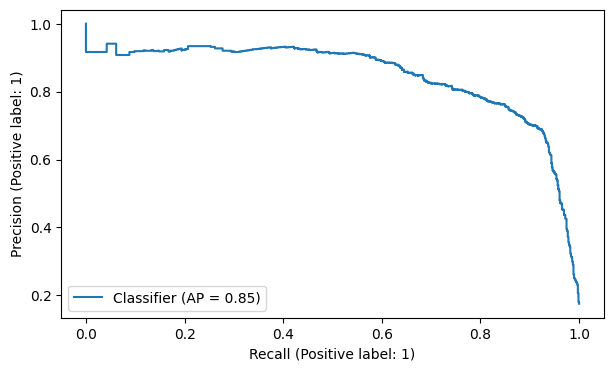

In [ ]:
y_pred_proba = model_bert.predict(test_ds)

PrecisionRecallDisplay.from_predictions(y_test3, y_pred_proba)

In [ ]:
BERT_without_weighted_rec = recall_score(y_test3, y_pred)
BERT_without_weighted_f1= f1_score(y_test3, y_pred)
BERT_without_weighted_AP = average_precision_score(y_test3, y_pred_proba)

In [ ]:
average_precision_score(y_test3, y_pred_proba)

0.8472452778911211

## BERT Model with Weighted

In [ ]:
def create_model():
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(145,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(145,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(180, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
from official.nlp import optimization
epochs = 3
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 1e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
with strategy.scope():

  # from tensorflow.keras.optimizers import Adam
  # from tensorflow.keras.losses import BinaryCrossentropy
  # from tensorflow.keras.metrics import Recall

  optimizer = optimizer
  loss = tf.keras.losses.BinaryCrossentropy()
  CustomRecall2 = tf.keras.metrics.Recall()
  model_bert2 = create_model()
  model_bert2.compile(optimizer=optimizer, loss=loss, metrics=[CustomRecall2])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
pd.Series(y).value_counts(normalize=True)

0    0.824828
1    0.175172
Name: target, dtype: float64

In [ ]:
weights = {0:0.2, 1:0.8}

In [ ]:
model_bert2.fit(train_ds, validation_data= val_ds,epochs=epochs, class_weight=weights)

Epoch 1/3
805/805 [==============================] - 223s 173ms/step - loss: 0.1702 - recall_1: 0.7947 - val_loss: 0.4744 - val_recall_1: 0.9071
Epoch 2/3
805/805 [==============================] - 78s 97ms/step - loss: 0.1341 - recall_1: 0.8863 - val_loss: 0.3134 - val_recall_1: 0.8071
Epoch 3/3
805/805 [==============================] - 79s 98ms/step - loss: 0.1223 - recall_1: 0.9130 - val_loss: 0.4383 - val_recall_1: 0.9071


In [ ]:
#there is no overfitting

In [ ]:
y_pred = model_bert2.predict(test_ds) >= 0.5

print(confusion_matrix(y_test3, y_pred))

print(classification_report(y_test3, y_pred))

224/224 [==============================] - 24s 76ms/step
[[3384  301]
 [  68  715]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      3685
           1       0.70      0.91      0.79       783

    accuracy                           0.92      4468
   macro avg       0.84      0.92      0.87      4468
weighted avg       0.93      0.92      0.92      4468



In [ ]:
y_train_pred = model_bert2.predict(train_ds) >= 0.5

print(confusion_matrix(y_train3, y_train_pred))

print(classification_report(y_train3, y_train_pred))

805/805 [==============================] - 22s 25ms/step
[[12420   813]
 [  208  2642]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     13233
           1       0.76      0.93      0.84      2850

    accuracy                           0.94     16083
   macro avg       0.87      0.93      0.90     16083
weighted avg       0.94      0.94      0.94     16083



In [ ]:
y_pred_proba = model_bert2.predict(test_ds)
average_precision_score(y_test2, y_pred_proba)

224/224 [==============================] - 7s 25ms/step


0.8714805050483347

In [ ]:
BERT_with_weighted_AP = average_precision_score(y_test3, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test3, y_pred)
BERT_with_weighted_rec = recall_score(y_test3, y_pred)

In [ ]:
average_precision_score(y_test3, y_pred_proba)

0.8714805050483347

### Compare Models F1 Scores, Recall Scores and Average Precision Score

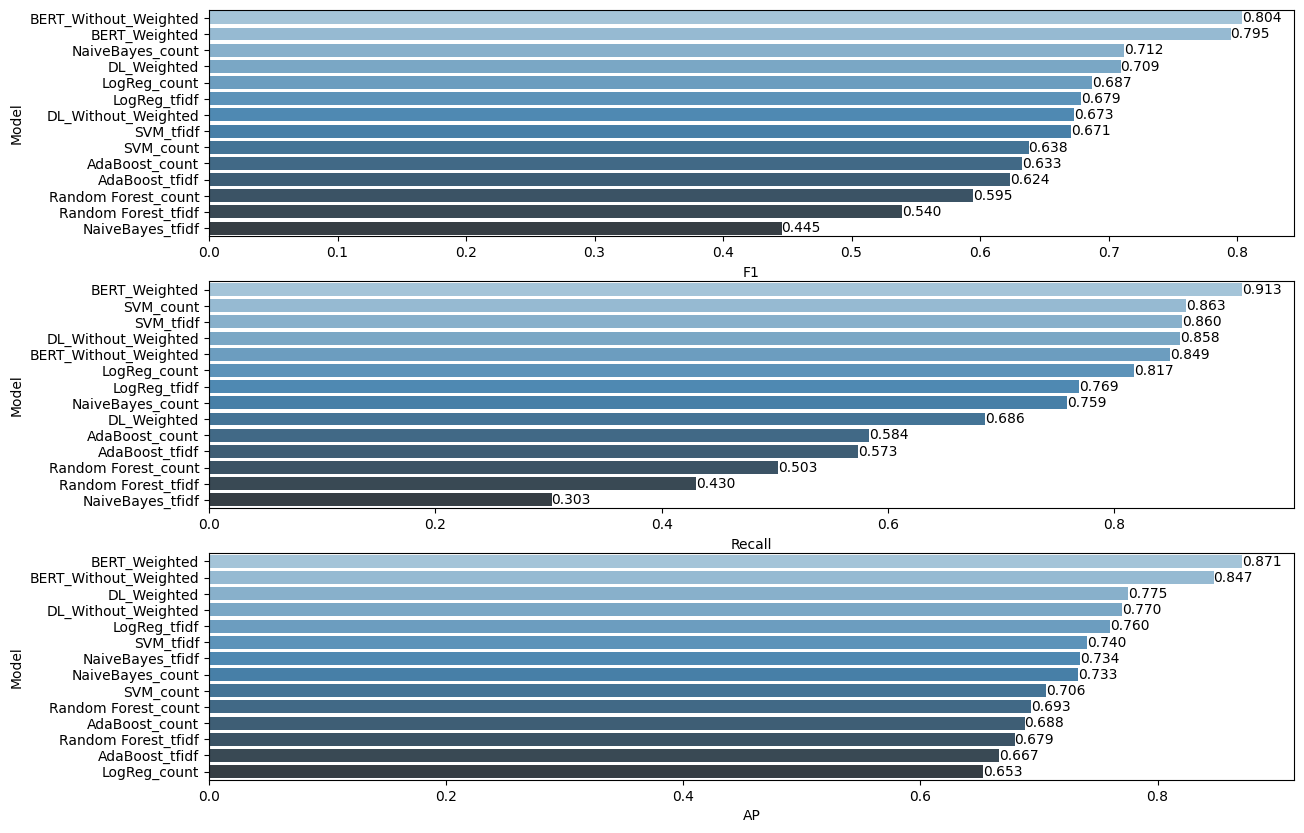

In [ ]:
compare = pd.DataFrame({
    "Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
              "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
              "Random Forest_tfidf", "AdaBoost_tfidf", "DL_Weighted", "DL_Without_Weighted",
              "BERT_Weighted", "BERT_Without_Weighted"],
    "F1": [nb_count_f1_neg[0], log_count_f1_neg[0], svc_count_f1_neg[0], rf_count_f1_neg[0],
           ada_count_f1_neg[0], nb_tfidf_f1_neg[0], log_tfidf_f1_neg[0], svc_tfidf_f1_neg[0],
           rf_tfidf_f1_neg[0], ada_tfidf_f1_neg[0], DL_UNWEIGHTED_f1, DL_WEIGHTED_f1,
           BERT_with_weighted_f1, BERT_without_weighted_f1],
    "Recall": [nb_count_rec_neg[0], log_count_rec_neg[0], svc_count_rec_neg[0], rf_count_rec_neg[0],
               ada_count_rec_neg[0], nb_tfidf_rec_neg[0], log_tfidf_rec_neg[0], svc_tfidf_rec_neg[0],
               rf_tdidf_rec_neg[0], ada_tfidf_rec_neg[0], DL_UNWEIGHTED_rec, DL_WEIGHTED_rec,
               BERT_with_weighted_rec, BERT_without_weighted_rec],
    "AP": [nb_AP_neg, log_AP_neg, svc_AP_neg, rf_AP_neg, ada_AP_neg, nb_tfidf_AP_neg,
           log_tfidf_AP_neg, svc_tfidf_AP_neg, rf_tfidf_AP_neg, ada_tfidf_AP_neg,
           DL_UNWEIGHTED_AP, DL_WEIGHTED_AP, BERT_with_weighted_AP, BERT_without_weighted_AP]
})


plt.figure(figsize=(14, 10))
compare['F1'] = pd.to_numeric(compare['F1'], errors='coerce')
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

compare['Recall'] = pd.to_numeric(compare['Recall'], errors='coerce')
plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

compare['AP'] = pd.to_numeric(compare['AP'], errors='coerce')

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.show()

### Conclusion

In [ ]:
# The Bert wighted mostly the best also the performance in Bert without weighted is also good
# some suggestions for models to get good results on Recall (Bert weighted ,SVM count , SVM tf idf , Deep learning weighted
#Bert without weighted)

## Deployment

In [ ]:
model_bert2.save_weights("/content/classification_model.h5")


In [ ]:
with strategy.scope():

  model4 = create_model()
  model4.load_weights("/content/classification_model.h5")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
def prep_data(text):
  import tensorflow as tf

  Xids_obs, Xmask_obs = transformation(text)

  dataset_obs = tf.data.Dataset.from_tensor_slices((Xids_obs, Xmask_obs))

  def map_func(Tensor_Xids, Tensor_Xmask):
       return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}

  dataset_obs = dataset_obs.map(map_func)

  batch_size = 16
  obs_ds = dataset_obs.batch(batch_size)

  return obs_ds

In [ ]:
text1 = "The T-shirts are disappointingly tight and do not resemble the image accurately."
text2 = "I really liked the T-shirt; it had the same color I wanted, and the fabric was to my liking."


In [ ]:
texts = [text1 ,text2]

In [ ]:
obs_ds = prep_data(texts)


In [ ]:
probs = model4.predict(obs_ds)
probs

1/1 [==============================] - 2s 2s/step


array([[0.85522735],
       [0.34974033]], dtype=float32)

In [ ]:
threshold = 0.5  # Set the threshold for binary classification

classes = []
probas = []

for prob in probs:
    predicted_class = 1 if prob > threshold else 0
    classes.append(predicted_class)
    probas.append(prob if predicted_class == 1 else 1 - prob)

In [ ]:
my_dict = {"Review":texts, "prob":probas, "classes":classes}

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(my_dict)

,Review,prob,classes
0,The T-shirts are disappointingly tight and do not resemble the image accurately.,[0.85522735],1
1,"I really liked the T-shirt; it had the same color I wanted, and the fabric was to my liking.",[0.6502597],0


In [ ]:
#the probability of class 1 is high so the model predicts it so well
#but for class 0 low the model is a little bit confused

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___